In [1]:
import os

import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#Encode the train images 
#Save in a CSV file
root_dir = 'C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/DevanagariHandwrittenCharacterDataset'
img_dir = os.path.join(root_dir, 'Train')

pixels = np.array(['pixel_{:04d}'.format(x) for x in range(1024)])
flag = True

for char_name in sorted(os.listdir(img_dir)):
    char_dir = os.path.join(img_dir, char_name)
    img_df = pd.DataFrame(columns=pixels)
    
    for img_file in sorted(os.listdir(char_dir)):
        image = pd.Series(imread(os.path.join(char_dir, img_file)).flatten(), index=pixels)
        img_df = img_df.append(image.T, ignore_index=True)
        
    img_df = img_df.astype(np.uint8)
    img_df['character'] = char_name
    
    img_df.to_csv('C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/Dev_train.csv', index=False, mode='a', header=flag)
    flag=False
    
    print('=', end='')
    
    
df = pd.read_csv('C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/Dev_train.csv')

df['character_class'] = LabelEncoder().fit_transform(df.character)
df.drop('character', axis=1, inplace=True)
df = df.astype(np.uint8)

# df.to_csv(r'C:\Users\sahil\Desktop\Dev_train.csv')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [6]:
root_dir = 'C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/DevanagariHandwrittenCharacterDataset'
img_dir = os.path.join(root_dir, 'Test')

pixels = np.array(['pixel_{:04d}'.format(x) for x in range(1024)])
flag = True

for char_name1 in sorted(os.listdir(img_dir)):
    char_dir1 = os.path.join(img_dir, char_name1)
    img_df1 = pd.DataFrame(columns=pixels)
    
    for img_file1 in sorted(os.listdir(char_dir1)):
        image1 = pd.Series(imread(os.path.join(char_dir1, img_file1)).flatten(), index=pixels)
        img_df1 = img_df1.append(image1.T, ignore_index=True)
        
    img_df1 = img_df1.astype(np.uint8)
    img_df1['character'] = char_name1
    
    img_df1.to_csv('C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/Dev_test.csv', index=False, mode='a', header=flag)
    flag=False
    
    print('=', end='')
    
df2 = pd.read_csv('C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/Dev_test.csv')
df2['character_class'] = LabelEncoder().fit_transform(df2.character)
df2.drop('character', axis=1, inplace=True)
df2 = df2.astype(np.uint8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


AttributeError: 'DataFrame' object has no attribute 'character'

In [94]:
df = pd.read_csv('C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/Dev_train.csv')
df['character_class'] = LabelEncoder().fit_transform(df.character)
df.drop('character', axis=1, inplace=True)
df = df.astype(np.uint8)

df2 = pd.read_csv('C:/Users/sahil/Documents/Business Analytics/Coursework - Winter Term/AI 2/Group Project/Dev_test.csv')
df2['character_class'] = LabelEncoder().fit_transform(df2.character)
df2.drop('character', axis=1, inplace=True)
df2 = df2.astype(np.uint8)

In [118]:
# X = np.array(df1.iloc[0:1022])
df_train = np.array(df.values)
df_test = np.array(df2.values)

x_train = (df_train[:, 0:1024])
y_train = (df_train[:, 1024])
x_test = (df_test[:, 0:1024])
y_test = (df_test[:, 1024])

print (np.shape(x_train), len(x_train))
print (np.shape(y_train), len(y_train))

# Sample Row
print (len(x_train[78199]))
print (y_train[78199])

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

# Normalize
x_train = x_train / 255.
x_test = x_test / 255.



(78200, 1024) 78200
(78200,) 78200
1024
45


(-0.5, 31.5, 31.5, -0.5)

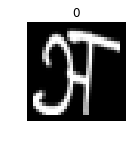

In [119]:
plt.subplot(131) #(131) -> 1 row, 3 columns, the first plot  
plt.imshow(x_train[0][:,:,0], cmap='gray')
plt.title(y_train[0])
plt.axis('off')

In [120]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)


num_classes = 46
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



(13800,)


In [127]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
#To clear model weights after each run
from keras.backend import clear_session

clear_session()
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(num_classes, activation='softmax'))

#initalize an optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay = 1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer=opt)

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs = 3, validation_data=(x_test,y_test))

Train on 78200 samples, validate on 13800 samples
Epoch 1/3
78200/78200 [==============================] - 29s 376us/step - loss: 1.7468 - acc: 0.5558 - val_loss: 0.9222 - val_acc: 0.7435
Epoch 2/3
78200/78200 [==============================] - 29s 372us/step - loss: 0.7268 - acc: 0.7965 - val_loss: 0.5657 - val_acc: 0.8361
Epoch 3/3
78200/78200 [==============================] - 29s 375us/step - loss: 0.4687 - acc: 0.8663 - val_loss: 0.4277 - val_acc: 0.8787


In [128]:
model.evaluate(x_test, y_test)

13800/13800 [==============================] - 2s 141us/step


[0.4276729551387573, 0.878695652173913]